# Importing Libraries

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Downloading Financial Data Using Yahoo Finance Library

In [32]:
Reliance = yf.download("RELIANCE.NS", start = "2022-10-18", end = "2023-10-18")

[*********************100%%**********************]  1 of 1 completed


# Forming Close Data Frame

In [36]:
close = Reliance.loc[:, ["Adj Close"]].copy()

# Calculating EMA for 20 and 50 Days (Fast and Slow)

In [39]:
close["EMA20"] = close["Adj Close"].ewm(span=20).mean()
close["EMA50"] = close["Adj Close"].ewm(span=50).mean()

# Buy and Sell Signals

In [54]:
close["signal"] = np.where(close["EMA20"]>close["EMA50"],1,0)
close["position"] = close["signal"].diff()
close["buy"] = np.where(close["position"]==1, close["EMA20"], np.NAN)
close["sell"] = np.where(close["position"]==-1, close["EMA20"], np.NAN)

# Plotting the Graph with the Signals

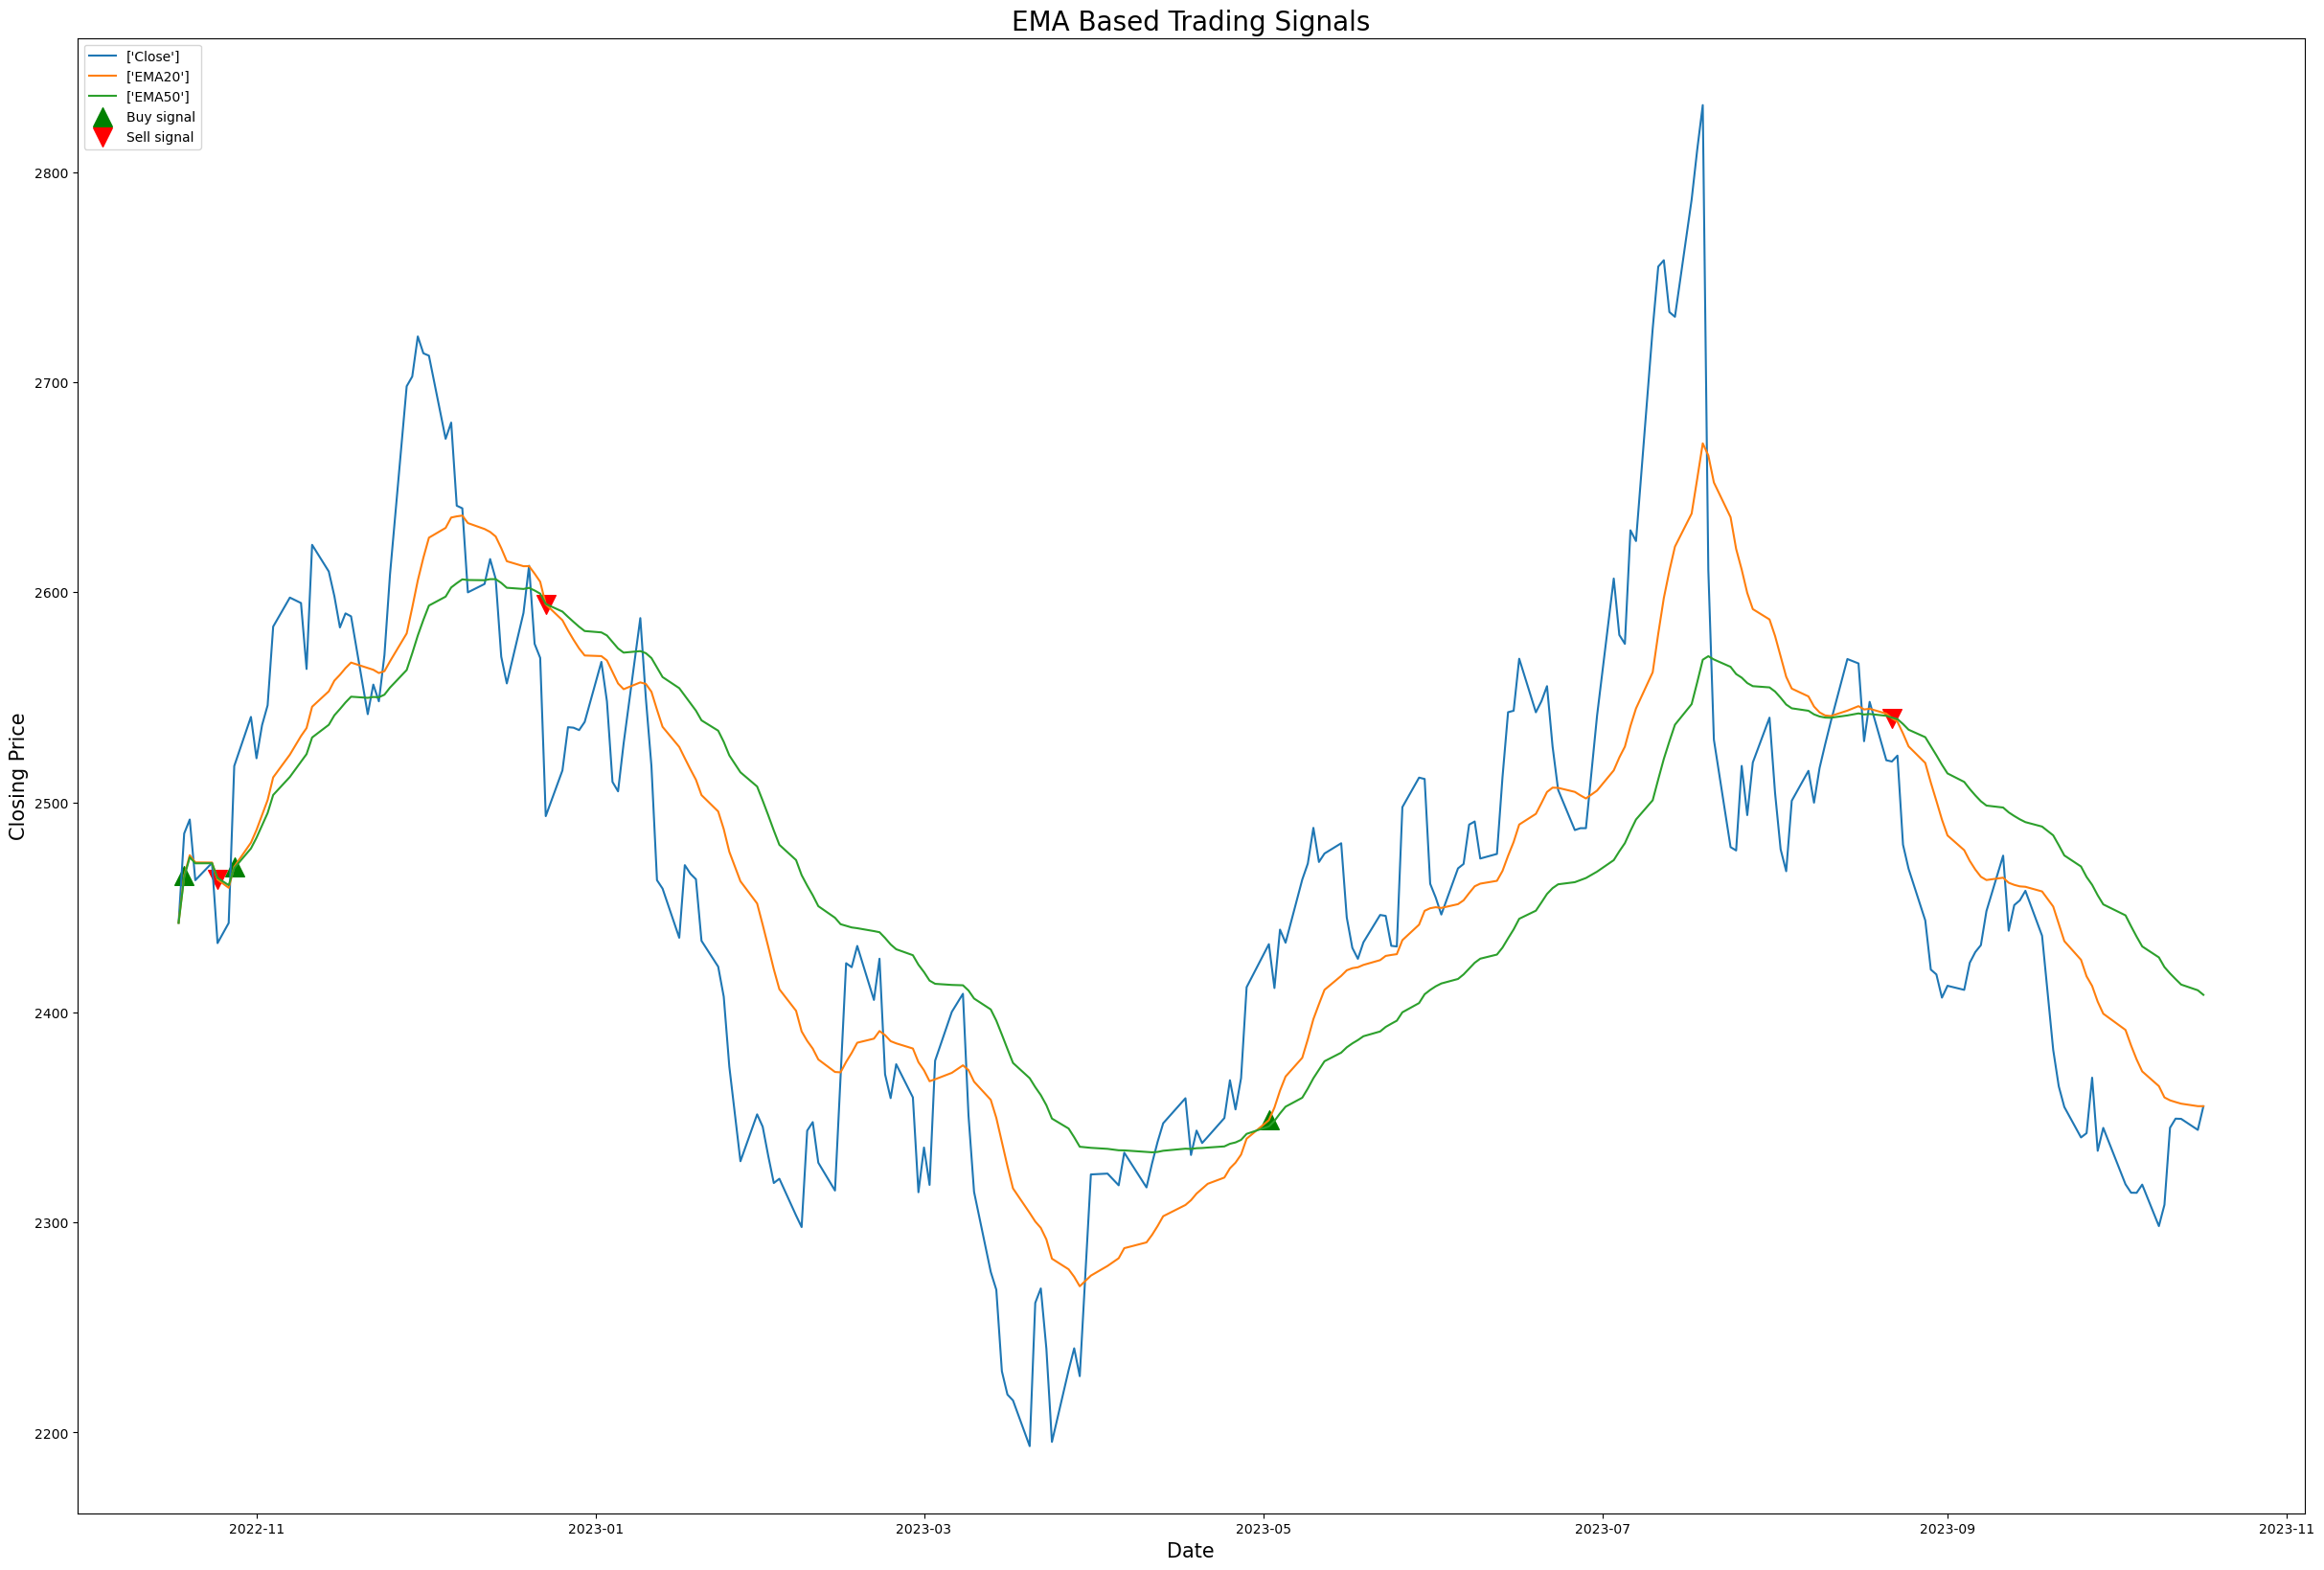

In [56]:
plt.figure(figsize=(30,20))
plt.title("EMA Based Trading Signals", fontsize = 20)
plt.plot(close["Adj Close"], label = ['Close'])
plt.plot(close["EMA20"], label = ['EMA20'])
plt.plot(close["EMA50"], label = ['EMA50'])
plt.scatter(close.index, close['buy'], alpha=1, label = "Buy signal", marker = "^", color = "green", s=200)
plt.scatter(close.index, close['sell'], alpha=1, label = "Sell signal", marker = "v", color = "red", s=200)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Closing Price", fontsize = 15)
plt.legend(loc="upper left", fontsize= 10)
plt.show()